In [4]:
import pandas as pd
import numpy as np
pd.options.plotting.backend = "plotly"
from prep import draw_tree

In [2]:
df = pd.read_csv('../data/housing.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [47]:
left_df = df[df['LSTAT'] < 9.14]

In [49]:
pred = left_df['PRICE'].mean()

In [50]:
root_error = np.mean((left_df['PRICE'] - pred)**2)

In [51]:
root_error

81.50110898224139

In [42]:
left_side = left_df[left_df['RM'] < 6.575]
right_side =  left_df[left_df['RM'] >= 6.575]

In [43]:
right_pred = right_side['PRICE'].mean()
left_pred  = left_side['PRICE'].mean()

right_error = np.mean((right_side['PRICE'] - right_pred)**2)
left_error  = np.mean((left_side['PRICE'] - left_pred)**2)

In [44]:
left_weight = left_side.shape[0] / df.shape[0]
right_weight = right_side.shape[0] / df.shape[0]

In [45]:
info_gain = root_error - (left_weight * left_error) - (right_weight * right_error)

In [46]:
info_gain

65.44108547490153

In [28]:
right_error = 84.4
right_error = 84.4

right_weight = .7
left_weight = .3

In [52]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
# you have to initialize the algorithm
tree = DecisionTreeRegressor(max_depth=3)

In [54]:
tree

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [56]:
tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [57]:
# you must declare depending and independent variable
y = df['PRICE']
X = df.drop('PRICE', axis=1)

In [60]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [58]:
tree.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

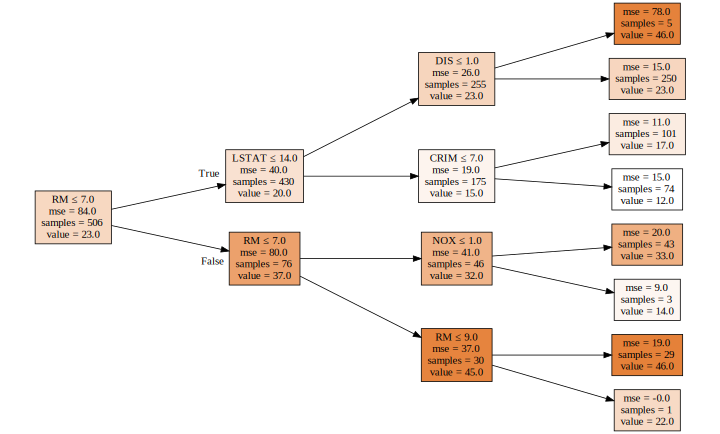

In [59]:
draw_tree(tree, X)

In [61]:
tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [63]:
df['Prediction'] = tree.predict(X)

In [64]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,Prediction
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,22.905200
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,22.905200
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.348837
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,33.348837
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,33.348837


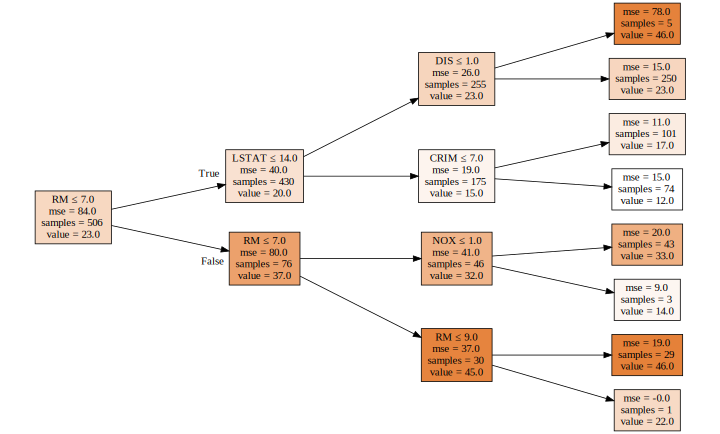

In [65]:
draw_tree(tree, X)

In [66]:
tree.score(X, y)

0.8177924678036445

In [67]:
x

NameError: name 'x' is not defined

In [68]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [69]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [70]:
?df.sample

In [74]:
df = df.sample(frac=1.0, random_state=42)

In [75]:
y = df['PRICE']
X = df.drop('PRICE', axis=1)

In [92]:
tree = DecisionTreeRegressor()

In [93]:
cutoff = int(X.shape[0]*0.8)

In [81]:
cutoff

404

In [94]:
X_train, y_train = X[:cutoff], y[:cutoff]
X_test, y_test = X[cutoff:], y[cutoff:]

In [83]:
tree = DecisionTreeRegressor(max_depth=4)

In [95]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [96]:
X_train['Prediction'] = tree.predict(X_train)
X_test['Prediction'] = tree.predict(X_test)

C:\Users\Jonat\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Jonat\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [97]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Prediction
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04,23.6
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53,32.4
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52,22.8
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27,16.1


In [98]:
tree.score(X_test, y_test)

0.7020559507808015

In [99]:
tree.score(X_train, y_train)

0.9140519192894417

In [89]:
df['Prediction'] = tree.predict(df.drop('PRICE', axis=1))

In [90]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,Prediction
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04,23.6,23.098507
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53,32.4,30.250000
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6,15.242857
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52,22.8,23.098507
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27,16.1,15.242857
